# Preparing for ISF '21
### Results analysis and graphing
---

## Plumbing

In [1]:
import sys
import os

import importlib
is_colab = importlib.util.find_spec("google")
found = is_colab is not None

import_path = ''
if found:
    from google.colab import drive
    drive.mount('/content/gdrive/', force_remount=True)
    import_path += '/content/gdrive/My Drive/Thesis/pairs/'

else:
    import_path += 'data/pairs/'

print(import_path)

data/pairs/


In [2]:
from utils.subsets import *
from utils.simulations import cumret

In [3]:
import pickle
oneyr = pickle.load(open('data/raw/26-coins_1D-returns.pkl', 'rb'))
twoyr = pickle.load(open('data/raw/14-coins_1D-returns.pkl', 'rb'))

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use("ggplot")

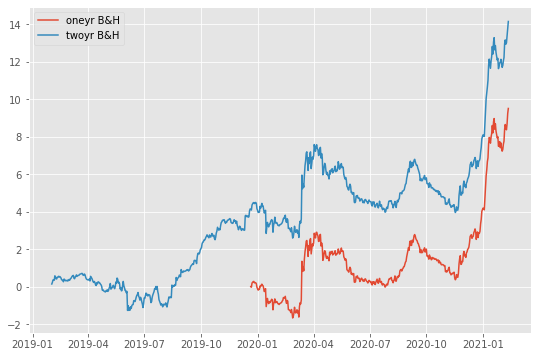

In [5]:
oneyravg = oneyr.mean(axis=1)
twoyravg = twoyr.mean(axis=1)

fig = plt.figure(figsize=(9,6))
plt.plot(cumret(oneyravg), label='oneyr B&H')
plt.plot(cumret(twoyravg), label="twoyr B&H")
plt.legend()
plt.show()

In [6]:
# 14 & 147, 26 & 83
one_yr_res = []
two_yr_res = []
import_path = 'results/pickle/'
for dirname, _, filenames in os.walk(import_path):
        for filename in filenames:
            if '.pkl' in filename:
                try:
                    res = pickle.load(open(import_path + filename, 'rb'))
                except EOFError:
                    print(f"EOFError on {filename}")
                    continue
                f = filename.split('.')[0]
                yhat = res.get_predictions()
                if yhat.shape == (83, 26):
                    one_yr_res.append(res)
                    rets = res.portfolio_returns()
#                     print(f"{f.split('_')}: {yhat.shape[0]}")
#                     print(f"{f.split('_')}: {rets.iloc[-1]}")
#                     print()
                elif yhat.shape == (147, 14):
                    two_yr_res.append(res)
                    rets = res.portfolio_returns()
#                     print(f"{f.split('_')}: {yhat.shape[0]}")
#                     print(f"{f.split('_')}: {rets.iloc[-1]}")
#                     print()

EOFError on 2021-06-18_14:54:44-retrain(1)-14Coins-AE(2)_20LSTMs(4).pkl


In [7]:
from utils.plotting import plot_portfolio_sims

oneyrmodels = {}
for res in one_yr_res:
#     print(res.get_model_name())
    oneyrmodels[res.get_model_name()] = []
for res in one_yr_res:
    oneyrmodels[res.get_model_name()].append(res)

print(oneyrmodels.keys())

print()
print('----------------------')
print()

twoyrmodels = {}
for res in two_yr_res:
#     print(res.get_model_name())
    twoyrmodels[res.get_model_name()] = []
for res in two_yr_res:
    twoyrmodels[res.get_model_name()].append(res)

print(twoyrmodels.keys())

dict_keys(['Multivariate PCA(2)-LSTM(4,6)', 'AE(2,200)-LSTM(4,6)', 'AE(2,200)-MultiModel(20)LSTMs(4,6)', 'Auto-Regressive (1) latent variable model', 'Auto-Regressive Moving-Average (1, 1) latent variable model', 'AE(2,200)-FFNN(15,6)'])

----------------------

dict_keys(['AE(2,200)-FFNN(15,6)', 'AE(2,200)-MultiModel(20)LSTMs(4,6)', 'AE(2,200)-LSTM(4,6)', 'LASSO_alpha-0.1', 'Multivariate PCA(2)-LSTM(4,6)', 'Auto-Regressive (1) latent variable model', 'Auto-Regressive Moving-Average (1, 1) latent variable model', 'AE(2,200)-MultiModel(10)LSTMs(4,6)'])


In [8]:
one_mvpcalstm = oneyrmodels['Multivariate PCA(2)-LSTM(4,6)'] 
one_aelstm = oneyrmodels['AE(2,200)-LSTM(4,6)'] 
one_aemmlstm = oneyrmodels['AE(2,200)-MultiModel(20)LSTMs(4,6)'] 
one_ar = oneyrmodels['Auto-Regressive (1) latent variable model'] 
one_arma = oneyrmodels['Auto-Regressive Moving-Average (1, 1) latent variable model'] 

two_mvpcalstm = twoyrmodels['Multivariate PCA(2)-LSTM(4,6)'] 
two_aelstm = twoyrmodels['AE(2,200)-LSTM(4,6)'] 
two_aemmlstm = twoyrmodels['AE(2,200)-MultiModel(20)LSTMs(4,6)'] 
two_ar = twoyrmodels['Auto-Regressive (1) latent variable model'] 
two_arma = twoyrmodels['Auto-Regressive Moving-Average (1, 1) latent variable model'] 
two_ffnn = twoyrmodels['AE(2,200)-FFNN(15,6)'] 
two_lasso = twoyrmodels['LASSO_alpha-0.1']

In [9]:
models_results = [two_mvpcalstm, two_aelstm, two_ar, two_arma, two_ffnn, two_lasso]
for arr_i, arr in enumerate(models_results):
    min_rmse = np.Inf
    rmse_i = 999
    max_ret = 0
    ret_i = 999
    count = 0
    for i, m in enumerate(arr):
        cumret = m.portfolio_returns().iloc[-1]
        rmse = m.get_rmse()
        if rmse < min_rmse:
            rmse_i = i
            min_rmse = rmse
        if cumret > max_ret:
            ret_i = i
            max_ret = cumret
        count +=1
    print(f'{count}-total simulations')
    print(f'Arr at entry {arr_i}:')
    print(f'Max ret = {max_ret} @ entry {ret_i}')
    print(f'Min rmse = {min_rmse} @ entry {rmse_i}')
    print()

42-total simulations
Arr at entry 0:
Max ret = 2.782465405716694 @ entry 29
Min rmse = 0.03997050523053221 @ entry 18

47-total simulations
Arr at entry 1:
Max ret = 8.035745474475654 @ entry 43
Min rmse = 0.00010429333577912853 @ entry 34

23-total simulations
Arr at entry 2:
Max ret = 8.228687999803919 @ entry 4
Min rmse = 9.693713068071839e-06 @ entry 13

23-total simulations
Arr at entry 3:
Max ret = 6.8708730620426595 @ entry 13
Min rmse = 9.777997686012542e-06 @ entry 20

47-total simulations
Arr at entry 4:
Max ret = 7.5836635824139575 @ entry 28
Min rmse = 1.0851310586740408e-05 @ entry 22

17-total simulations
Arr at entry 5:
Max ret = 9.847932015637939 @ entry 8
Min rmse = 9.620358448166624e-06 @ entry 14



In [39]:
models = ["AR(1)", "ARMA(1,1)", "LASSO", "PCALSTM", "FFNN", "AELSTM"]
arrs = [two_ar, two_arma, two_lasso, two_mvpcalstm, two_ffnn, two_aemmlstm]

modnames, rmses, cumrets = [], [], []

for i, model in enumerate(models):
    for j, m in enumerate(arrs[i]):
        modnames.append(model)
        rmses.append(m.get_rmse())
        cumrets.append(m.portfolio_returns().iloc[-1])
        
twoyrdf = pd.DataFrame({"Model":modnames, "RMSE": rmses, "Cumulative Return": cumrets})

In [40]:
twoyrdf

,Model,RMSE,Cumulative Return
0,AR(1),0.000010,4.018450
1,AR(1),0.000010,4.637237
2,AR(1),0.000010,4.234874
3,AR(1),0.000010,6.373200
4,AR(1),0.000010,8.228688
...,...,...,...
168,AELSTM,0.000015,5.125928
169,AELSTM,0.000019,4.995576
170,AELSTM,0.000016,4.504675
171,AELSTM,0.000018,3.330080


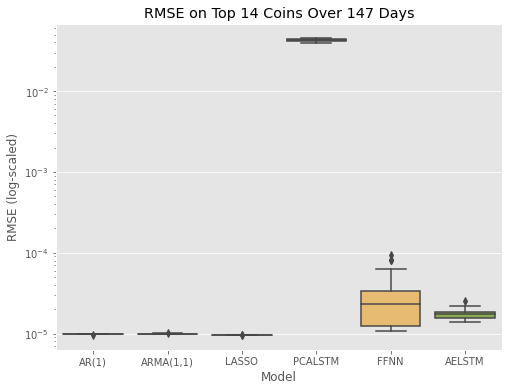

In [95]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Model', y='RMSE', data=twoyrdf[(twoyrdf != 'PCALSTM').any(axis=1)])
# sns.swarmplot(x='Model', y='RMSE', data=twoyrdf)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("RMSE on Top 14 Coins Over 147 Days")
plt.yscale('log')
plt.ylabel("RMSE (log-scaled)")
plt.show()

In [92]:
cleaner_twoyrdf = twoyrdf.loc[~twoyrdf['Model'].isin(['PCALSTM'])]

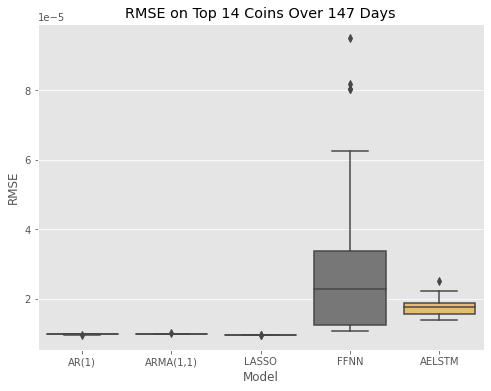

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Model', y='RMSE', data=cleaner_twoyrdf)
# sns.swarmplot(x='Model', y='RMSE', data=twoyrdf)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("RMSE on Top 14 Coins Over 147 Days")
# plt.yscale('log')
plt.show()

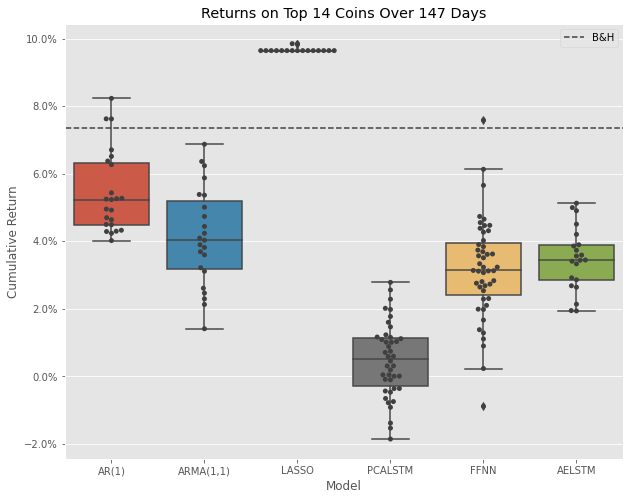

In [60]:
y = 7.35
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Cumulative Return', data=twoyrdf)
sns.swarmplot(x='Model', y='Cumulative Return', data=twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Returns on Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()

----
older attempts

In [10]:
two_mvpcalstm_rmses = []
two_mvpcalstm_cumret = []
for i, m in enumerate(two_mvpcalstm):
    two_mvpcalstm_rmses.append(m.get_rmse())
    two_mvpcalstm_cumret.append(m.portfolio_returns().iloc[-1])

In [11]:
two_aelstm_rmses = []
two_aelstm_cumret = []
for i, m in enumerate(two_aelstm):
    two_aelstm_rmses.append(m.get_rmse())
    two_aelstm_cumret.append(m.portfolio_returns().iloc[-1])

In [12]:
two_aemmlstm_rmses = []
two_aemmlstm_cumret = []
for i, m in enumerate(two_aemmlstm):
    two_aemmlstm_rmses.append(m.get_rmse())
    two_aemmlstm_cumret.append(m.portfolio_returns().iloc[-1])

In [13]:
two_ar_rmses = []
two_ar_cumret = []
for i, m in enumerate(two_ar):
    two_ar_rmses.append(m.get_rmse())
    two_ar_cumret.append(m.portfolio_returns().iloc[-1])

In [14]:
two_arma_rmses = []
two_arma_cumret = []
for i, m in enumerate(two_arma):
    two_arma_rmses.append(m.get_rmse())
    two_arma_cumret.append(m.portfolio_returns().iloc[-1])

In [15]:
two_ffnn_rmses = []
two_ffnn_cumret = []
for i, m in enumerate(two_ffnn):
    two_ffnn_rmses.append(m.get_rmse())
    two_ffnn_cumret.append(m.portfolio_returns().iloc[-1])

In [16]:
two_lasso_rmses = []
two_lasso_cumret = []
for i, m in enumerate(two_lasso):
    two_lasso_rmses.append(m.get_rmse())
    two_lasso_cumret.append(m.portfolio_returns().iloc[-1])

In [17]:
two_rmse_df = pd.DataFrame([two_arma_rmses,two_ar_rmses, two_lasso_rmses, 
                            two_mvpcalstm_rmses, two_ffnn_rmses, two_aelstm_rmses]).T

two_rmse_df.columns = ["ARMA(1,1)", "AR(1)", "LASSO", "PCALSTM", "FFNN", "AELSTM"]

two_ret_df = pd.DataFrame([two_arma_cumret,two_ar_cumret,two_lasso_cumret,
                           two_mvpcalstm_cumret,two_ffnn_cumret,two_aelstm_cumret]).T

two_ret_df.columns = ["ARMA(1,1)", "AR(1)", "LASSO", "PCALSTM", "FFNN", "AELSTM"]

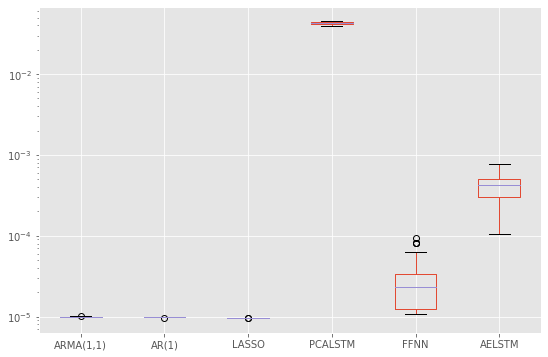

In [18]:
fig= plt.figure(figsize=(9,6))
two_rmse_df.boxplot()
plt.yscale('log')
plt.show()

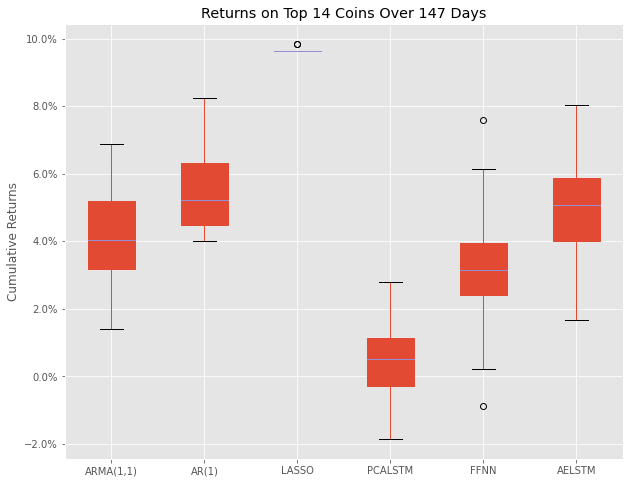

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
boxes = two_ret_df.boxplot(patch_artist=True)
ax.set_title("Returns on Top 14 Coins Over 147 Days")
ax.set_ylabel("Cumulative Returns")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [20]:
models = ["ARMA(1,1)", "AR(1)", "LACSSO" "PCALSTM","FFNN", "AELSTM"]

In [38]:
twoyrdf = pd.DataFrame({"Model":[], "RMSE": [], "Cumulative Return": []})
twoyrdf.append({"Model":["test", 'a'], "RMSE": [3, 4], "Cumulative Return": [3, 6]})

TypeError: Can only append a dict if ignore_index=True